# Homework 7 Part 3

## Problem 3

Solve the Black-Scholes equation for the European Call Option price $C = C(S, t)$, using the Explicit Finite Difference Scheme/

$$
\left\{
\begin{array}{ll}
\frac{\partial C}{\partial t} + \frac{1}{2} \cdot \sigma^2 \cdot S^2 \cdot \frac{\partial^2 C}{\partial S^2} + r\cdot S \cdot \frac{\partial C}{\partial S} - r \cdot C = 0, & S\in (0, + \infty), t\in (0, T)\\[6pt]
C(S, T) = max(S-K, 0)\\[6pt]
C(0, t) = 0, & t\in [0, T]\\[6pt]
\lim_{s\to +\infty} \frac{C(S, t)}{S} = 1, & t\in [0, T]
\end{array}
\right.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
r = 0.02
sigma = 0.5
T = 8/365
k = 155
smax = 200

In [3]:
n = 20
m = 1000
s = smax * np.arange(m+1)/m
t = T * np.arange(n+1)/n
ds = smax/m
dt = T/n

In [4]:
c = np.zeros((m+1, n+1))

In [5]:
def left(s):
    return 0

def right(s):
    return 0

def terminal(k, i, ds):
    return max(i*ds - k, 0)

In [6]:
c[0,:] = left(s)
c[m,:] = right(s)
for i in range(m):
    c[:,n] = terminal(k, i, ds)

The update scheme for the TBVP will be the following:
$$ \frac{c_{i, j} - c_{i, j-1}}{ds} + \frac{\sigma^2}{2}\big( \frac{c_{i+1, j} - 2c_{i,j} + c_{i-1, j}}{dt^2}\big) + r(i \cdot dt) \big( \frac{c_{i+1, j} - c{i, j}}{dt}\big) - r\cdot c_{i, j} = 0$$

where $i = 1, ..., m-1$ and $j = 1, ..., n$

In [7]:
for i in range(1, m):
    for j in reversed(range(1, n+1)):
        c[i, j-1] = c[i, j] + dt*((sigma**2*0.5*ds**2*(c[i+1, j] - 2*c[i, j] + c[i-1, j])) + r*i*(c[i+1, j] - c[i, j]) - r*c[i, j])

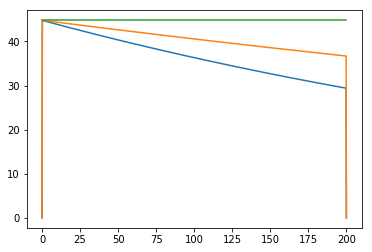

In [8]:
plt.plot(s, c[:,0], s, c[:, 10], s, c[:, 20])
plt.show()